In [2]:
import glob
import os.path
import PIL.Image as Image
import matplotlib.pyplot as plt
import torch
import torchvision
import torch.nn as nn
import torch.utils.data as Data
import torch.utils.data.dataloader as Dataloader
import qqdm
import numpy as np
import argparse
import os
import sys

In [3]:
# 防止报错
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['CUDA_VISIBLE_DEVICES']='0'
sys.argv = ['run.py']

'''
    1. 参数设定
'''

parser = argparse.ArgumentParser(description="Demo of argparse")
parser.add_argument('--path', type=str, default='./炬视科技-基于小样本的异常检测任务挑战赛初赛公开数据/train/01/Images')
parser.add_argument('--Batchsize', type=int, default=2)
parser.add_argument('--fps', type=int, default=10)
parser.add_argument('--learning_rate', type=float, default=0.001)
parser.add_argument('--epochs', type=int, default=1)
args = parser.parse_args()

In [4]:
'''
    2. 定义数据集
'''


class MyDataset(nn.Module):
    def __init__(self, path, transforms):
        super(MyDataset, self).__init__()
        self.path = path
        self.transform = transforms
        self.imgs = glob.glob(os.path.join(self.path, '*.jpg'))

    def __getitem__(self, index):
        item = self.transform(Image.open(self.imgs[index % len(self.imgs)]))
        return item

    def __len__(self):
        return len(self.imgs)

In [5]:
'''
    3. 加载数据集
'''

transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),
                                             torchvision.transforms.Resize([200, 200])])

dataset = MyDataset(args.path, transforms)
dataloader = Dataloader.DataLoader(dataset=dataset, batch_size=args.Batchsize, shuffle=True)

# print(len(dataset))

In [6]:
'''
    4. 定义 autoencoder
'''


class AutoencoderNet(nn.Module):

    def __init__(self):
        super(AutoencoderNet, self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(3, 64, 5, 1, 2), nn.ReLU(),
            nn.Conv2d(64, 128, 5, 2, 2), nn.ReLU(),
            nn.Conv2d(128, 256, 5, 2, 2), nn.ReLU(),
            nn.Conv2d(256, 512, 5, 1, 2), nn.ReLU(),
            nn.ConvTranspose2d(512, 256, 5, 2, 2, 1), nn.ReLU(),
            nn.ConvTranspose2d(256, 64, 5, 2, 2, 1), nn.ReLU(),
            nn.Conv2d(64, 3, 5, 1, 2), nn.ReLU()
        )

    def forward(self, X):
        output = self.layer(X)
        return output

In [7]:
'''
    5. 定义 网络、优化器、损失函数
'''

net = AutoencoderNet()
net.cuda()
optimizer = torch.optim.Adam(net.parameters(), lr=args.learning_rate)
loss = nn.MSELoss()

In [8]:
'''
    6. 看看网络结构
'''
# X = torch.rand(size=(100, 3, 200, 200), dtype=torch.float32)
# X = X.cuda()
# for layer in net.layer:
#     X = layer(X)
#     # 输出对应层的shape
#     print(layer.__class__.__name__, 'output shape: \t', X.shape)

'\n    6. 看看网络结构\n'

 Iters    Elapsed Time      Speed                                               
 0/40           -             -                                                 
  0.0% |                                                                       |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.5374370217323303
第1张图检测异常


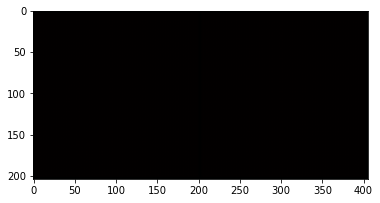

 Iters    Elapsed Time      Speed                                               
 1/40   00:00:08<00:05:20  0.12it/s                                             
  2.5% |█                                                                      |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.6951076984405518
第2张图检测异常


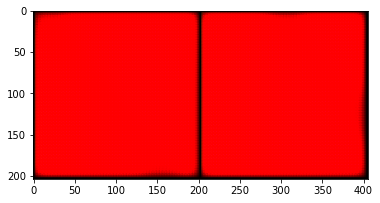

 Iters    Elapsed Time      Speed                                               
 2/40   00:00:08<00:02:50  0.22it/s                                             
  5.0% |███                                                                    |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.5309603214263916
第3张图检测异常


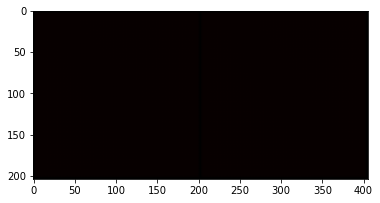

 Iters    Elapsed Time      Speed                                               
 3/40   00:00:09<00:01:58  0.31it/s                                             
  7.5% |█████                                                                  |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.5007625222206116
第4张图检测异常


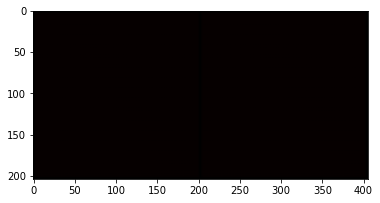

 Iters    Elapsed Time      Speed                                               
 4/40   00:00:10<00:01:32  0.39it/s                                             
 10.0% |███████                                                                |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.5088402032852173
第5张图检测异常


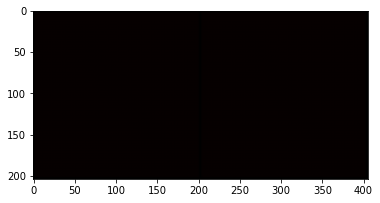

 Iters    Elapsed Time      Speed                                               
 5/40   00:00:10<00:01:16  0.45it/s                                             
 12.5% |████████                                                               |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.521586000919342
第6张图检测异常


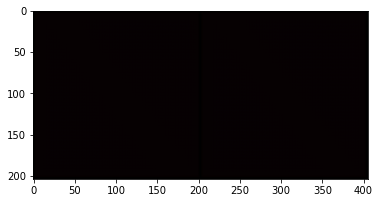

 Iters    Elapsed Time      Speed                                               
 6/40   00:00:11<00:01:06  0.51it/s                                             
 15.0% |██████████                                                             |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.4211643636226654
第7张图检测异常


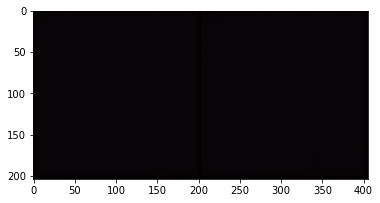

 Iters    Elapsed Time      Speed                                               
 7/40   00:00:12<00:00:58  0.56it/s                                             
 17.5% |████████████                                                           |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.438325971364975
第8张图检测异常


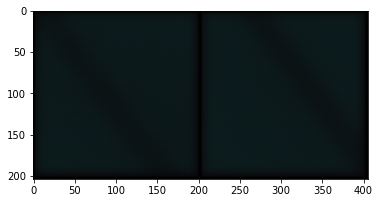

 Iters    Elapsed Time      Speed                                               
 8/40   00:00:13<00:00:52  0.61it/s                                             
 20.0% |██████████████                                                         |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.22170893847942352
第9张图检测异常


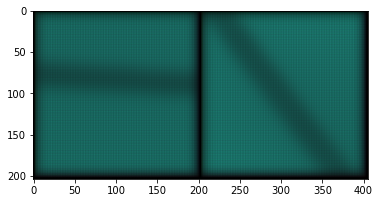

 Iters    Elapsed Time      Speed                                               
 9/40   00:00:13<00:00:48  0.64it/s                                             
 22.5% |███████████████                                                        |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.4428088366985321
第10张图检测异常


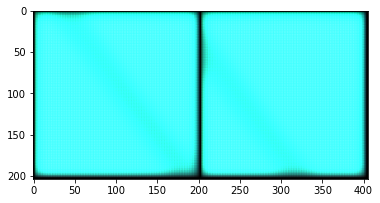

 Iters    Elapsed Time      Speed                                               
 10/40  00:00:14<00:00:44  0.67it/s                                             
 25.0% |█████████████████                                                      |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.09859327971935272
第11张图检测异常


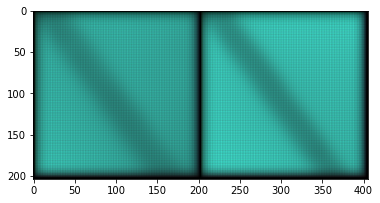

 Iters    Elapsed Time      Speed                                               
 11/40  00:00:15<00:00:41  0.70it/s                                             
 27.5% |███████████████████                                                    |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.20883989334106445
第12张图检测异常


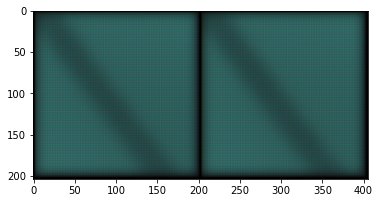

 Iters    Elapsed Time      Speed                                               
 12/40  00:00:17<00:00:39  0.71it/s                                             
 30.0% |█████████████████████                                                  |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.26571038365364075
第13张图检测异常


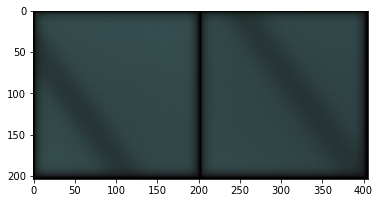

 Iters    Elapsed Time      Speed                                               
 13/40  00:00:18<00:00:38  0.71it/s                                             
 32.5% |███████████████████████                                                |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.25031593441963196
第14张图检测异常


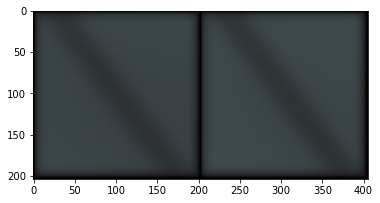

 Iters    Elapsed Time      Speed                                               
 14/40  00:00:19<00:00:35  0.74it/s                                             
 35.0% |████████████████████████                                               |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.19017793238162994
第15张图检测异常


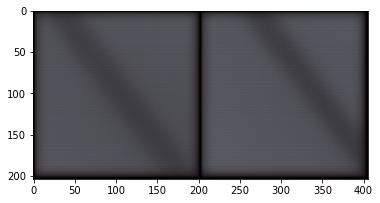

 Iters    Elapsed Time      Speed                                               
 15/40  00:00:19<00:00:32  0.76it/s                                             
 37.5% |██████████████████████████                                             |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.08484897762537003
第16张图检测异常


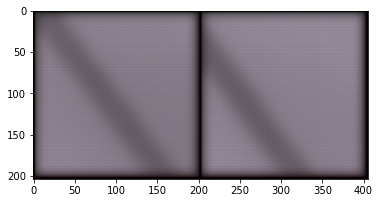

 Iters    Elapsed Time      Speed                                               
 16/40  00:00:20<00:00:31  0.77it/s                                             
 40.0% |████████████████████████████                                           |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.04312537610530853
第17张图检测异常


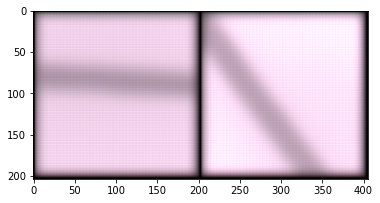

 Iters    Elapsed Time      Speed                                               
 17/40  00:00:21<00:00:29  0.78it/s                                             
 42.5% |██████████████████████████████                                         |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.14797383546829224
第18张图检测异常


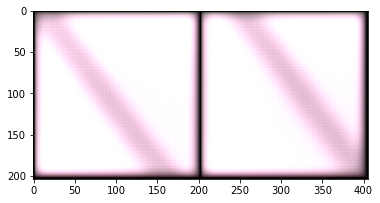

 Iters    Elapsed Time      Speed                                               
 18/40  00:00:22<00:00:27  0.80it/s                                             
 45.0% |███████████████████████████████                                        |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.03300994634628296
第19张图检测异常


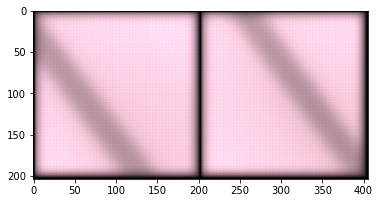

 Iters    Elapsed Time      Speed                                               
 19/40  00:00:23<00:00:25  0.82it/s                                             
 47.5% |█████████████████████████████████                                      |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.03585232421755791
第20张图检测异常


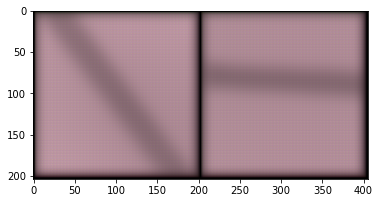

 Iters    Elapsed Time      Speed                                               
 20/40  00:00:23<00:00:23  0.84it/s                                             
 50.0% |███████████████████████████████████                                    |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.07798212766647339
第21张图检测异常


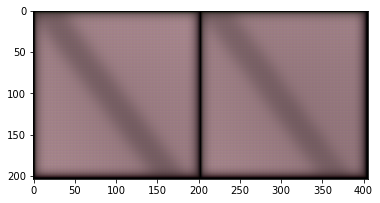

 Iters    Elapsed Time      Speed                                               
 21/40  00:00:24<00:00:22  0.86it/s                                             
 52.5% |█████████████████████████████████████                                  |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.07321245223283768
第22张图检测异常


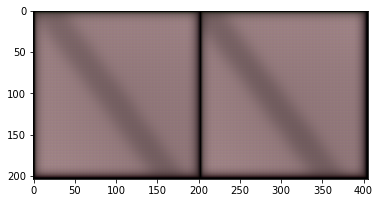

 Iters    Elapsed Time      Speed                                               
 22/40  00:00:25<00:00:20  0.87it/s                                             
 55.0% |███████████████████████████████████████                                |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.03486589714884758
第23张图检测异常


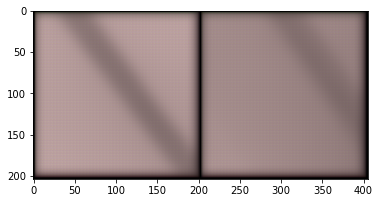

 Iters    Elapsed Time      Speed                                               
 23/40  00:00:26<00:00:19  0.88it/s                                             
 57.5% |████████████████████████████████████████                               |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.027098292484879494
第24张图检测异常


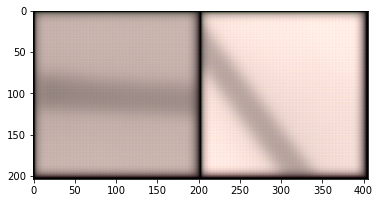

 Iters    Elapsed Time      Speed                                               
 24/40  00:00:27<00:00:18  0.88it/s                                             
 60.0% |██████████████████████████████████████████                             |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.02564840577542782
第25张图检测异常


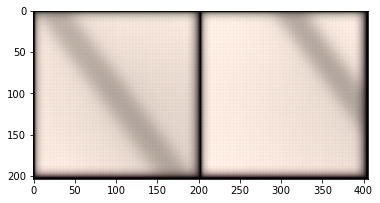

 Iters    Elapsed Time      Speed                                               
 25/40  00:00:27<00:00:16  0.90it/s                                             
 62.5% |████████████████████████████████████████████                           |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.018676115199923515
第26张图检测异常


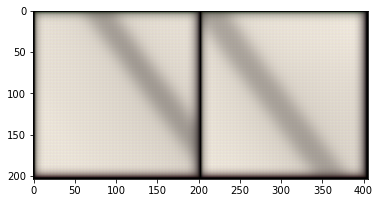

 Iters    Elapsed Time      Speed                                               
 26/40  00:00:29<00:00:15  0.88it/s                                             
 65.0% |██████████████████████████████████████████████                         |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.01738644950091839
第27张图检测异常


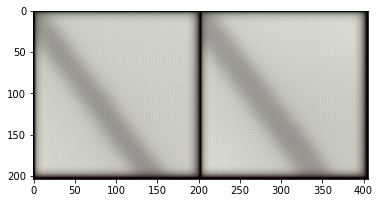

 Iters    Elapsed Time      Speed                                               
 27/40  00:00:30<00:00:14  0.89it/s                                             
 67.5% |███████████████████████████████████████████████                        |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.012411314062774181
第28张图检测异常


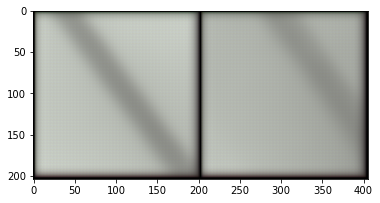

 Iters    Elapsed Time      Speed                                               
 28/40  00:00:31<00:00:13  0.89it/s                                             
 70.0% |█████████████████████████████████████████████████                      |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.012206844054162502
第29张图检测异常


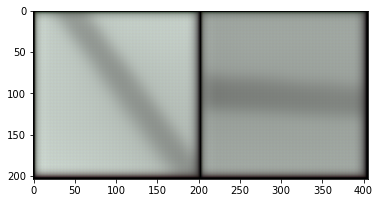

 Iters    Elapsed Time      Speed                                               
 29/40  00:00:32<00:00:12  0.90it/s                                             
 72.5% |███████████████████████████████████████████████████                    |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.015247784554958344
第30张图检测异常


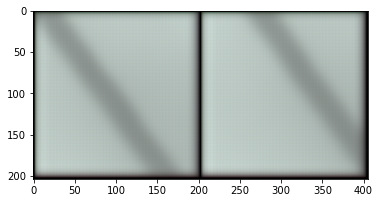

 Iters    Elapsed Time      Speed                                               
 30/40  00:00:32<00:00:10  0.91it/s                                             
 75.0% |█████████████████████████████████████████████████████                  |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.01400141790509224
第31张图检测异常


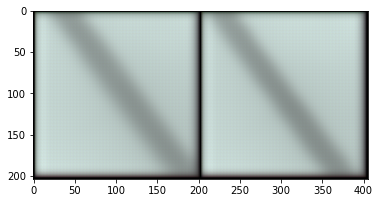

 Iters    Elapsed Time      Speed                                               
 31/40  00:00:33<00:00:09  0.92it/s                                             
 77.5% |███████████████████████████████████████████████████████                |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.011151984333992004
第32张图检测异常


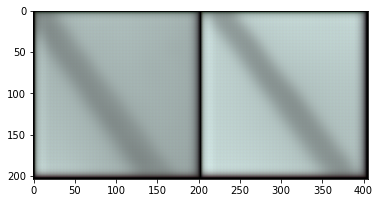

 Iters    Elapsed Time      Speed                                               
 32/40  00:00:35<00:00:08  0.91it/s                                             
 80.0% |████████████████████████████████████████████████████████               |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.01602337323129177
第33张图检测异常


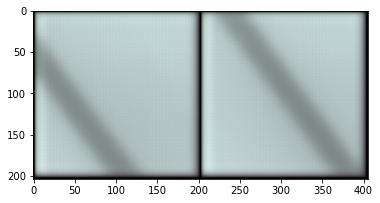

 Iters    Elapsed Time      Speed                                               
 33/40  00:00:35<00:00:07  0.92it/s                                             
 82.5% |██████████████████████████████████████████████████████████             |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.015670601278543472
第34张图检测异常


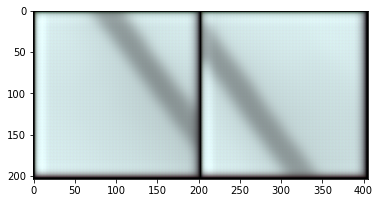

 Iters    Elapsed Time      Speed                                               
 34/40  00:00:37<00:00:06  0.92it/s                                             
 85.0% |████████████████████████████████████████████████████████████           |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.013176198117434978
第35张图检测异常


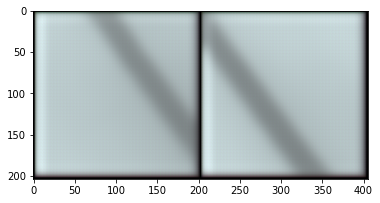

 Iters    Elapsed Time      Speed                                               
 35/40  00:00:38<00:00:05  0.91it/s                                             
 87.5% |██████████████████████████████████████████████████████████████         |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.009318452328443527
第36张图检测异常


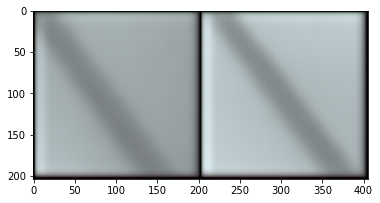

 Iters    Elapsed Time      Speed                                               
 36/40  00:00:38<00:00:04  0.92it/s                                             
 90.0% |███████████████████████████████████████████████████████████████        |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.010050136595964432
第37张图检测异常


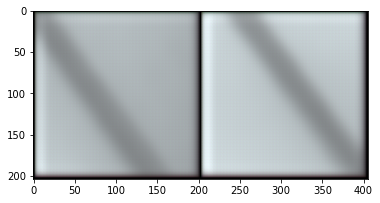

 Iters    Elapsed Time      Speed                                               
 37/40  00:00:40<00:00:03  0.91it/s                                             
 92.5% |█████████████████████████████████████████████████████████████████      |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.010504781268537045
第38张图检测异常


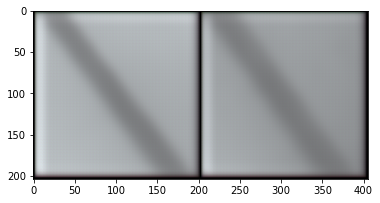

 Iters    Elapsed Time      Speed                                               
 38/40  00:00:41<00:00:02  0.92it/s                                             
 95.0% |███████████████████████████████████████████████████████████████████    |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])
0.011824113316833973
第39张图检测异常


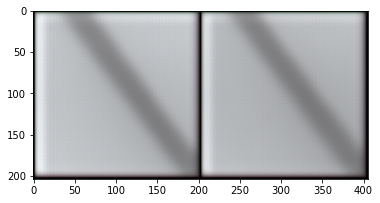

 Iters    Elapsed Time      Speed                                               
 39/40  00:00:42<00:00:01  0.93it/s                                             
 97.5% |█████████████████████████████████████████████████████████████████████  |

torch.Size([2, 3, 200, 200]) torch.Size([2, 3, 200, 200])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.01809203065931797
第40张图检测异常


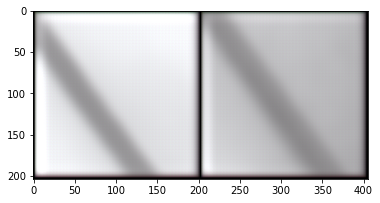

 Iters    Elapsed Time      Speed                                               
 40/40  00:00:42<00:00:00  0.93it/s                                             
100.0% |███████████████████████████████████████████████████████████████████████| Iters    Elapsed Time      Speed                                               
 40/40  00:00:42<00:00:00  0.93it/s                                             
100.0% |███████████████████████████████████████████████████████████████████████|

In [9]:
'''
    7. 训练
'''
for epoch in range(args.epochs):
    processbar = qqdm.qqdm(dataloader)

    step = 0
    for i, data in enumerate(processbar):
        data = data.cuda()
        optimizer.zero_grad()
        image_out = net(data)
        print(image_out.shape, data.shape)
        l = loss(image_out, data)

        l.backward()
        optimizer.step()
        step += 1

        # processbar.set_info({
        #     'step': step,
        #     'epoch': epoch + 1
        # })

        print(l.item())
        if l.item() >= 0.007:
            print('第{}张图检测异常'.format((i+1)))
            img = image_out.cpu()
            # make_grid的作用是将若干幅图像拼成一幅图像
            img = torchvision.utils.make_grid(img, normalize=2)
            # 交换维度索引
            # plt.figure(figsize=(10,10))
            plt.imshow(img.permute(1, 2, 0))
            plt.show()

# torch.save(net, './model/detection.pkl')